<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_tracking_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://covidtracking.com/api

In [0]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np

In [3]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-06-02 13:38:16.765167


In [0]:
current_states = request.get('https://covidtracking.com/api/v1/states/current.json')
current_states_daily = request.get('https://covidtracking.com/api/v1/states/daily.json')
current_us = request.get('https://covidtracking.com/api/v1/us/current.json')

In [0]:
states = pd.DataFrame.from_dict(current_states.json())
states_daily = pd.DataFrame.from_dict(current_states_daily.json())
us = pd.DataFrame.from_dict(current_us.json())

In [6]:
states_daily

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200601,WY,910.0,24237.0,NaN,8.0,86.0,NaN,NaN,NaN,NaN,667.0,C,5/31/2020 00:00,2020-05-31T00:00:00Z,05/30 20:00,17.0,86.0,2020-05-31T00:00:00Z,56,7,747,25147,25147,754,25147,1,1,67fcd7698f2e3d9cb0bf8fa9d4814b4fd85c12f2,0,0,0,0,0,
1,20200601,WV,2017.0,96078.0,NaN,31.0,NaN,11.0,NaN,4.0,NaN,1313.0,B,6/1/2020 10:00,2020-06-01T10:00:00Z,06/01 06:00,75.0,NaN,2020-06-01T10:00:00Z,54,7,466,98095,98095,473,98095,0,0,e5b0ea7a07d858b656430bf96917d5c4009d8b87,0,0,0,0,0,
2,20200601,WI,18543.0,253595.0,211.0,613.0,2603.0,136.0,586.0,NaN,NaN,11838.0,A+,6/1/2020 00:00,2020-06-01T00:00:00Z,05/31 20:00,595.0,2603.0,2020-06-01T00:00:00Z,55,140,3492,272349,272138,3632,272138,3,20,5138400d8446c6a41b0dc0c61bd0d7153b954c00,0,0,0,0,0,
3,20200601,WA,21702.0,339197.0,NaN,245.0,3501.0,NaN,NaN,52.0,NaN,NaN,B,5/31/2020 02:59,2020-05-31T02:59:00Z,05/30 22:59,1118.0,3501.0,2020-05-31T02:59:00Z,53,353,6192,360899,360899,6545,360899,0,21,4f820e91a6452b95caad4ccfd468decb27805a63,0,0,0,0,0,
4,20200601,VT,983.0,34343.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN,880.0,B,6/1/2020 00:00,2020-06-01T00:00:00Z,05/31 20:00,55.0,NaN,2020-06-01T00:00:00Z,50,2,1354,35326,35326,1356,35326,0,0,f8ebdaf5e4cc89227cf2d5439c0bd5de0d85de51,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,20200126,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,53,0,0,1,1,0,1,0,0,c91362aca4975445557b14f49e3ef797de1e0b1c,0,0,0,0,0,
4941,20200125,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,53,0,0,1,1,0,1,0,0,9be1bec9296e55b7910716eeef161f40b7dae898,0,0,0,0,0,
4942,20200124,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,53,0,0,1,1,0,1,0,0,9c9fcbd72b97700fdf886f77e8c16c9538883163,0,0,0,0,0,
4943,20200123,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,53,0,0,1,1,0,1,0,0,7b7bb15b16e3613cf1fd2d7cee5a90d483f63662,0,0,0,0,0,


In [0]:
ny_daily = states_daily.loc[states_daily['state'] == 'NY']

In [8]:
ny_daily

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
18,20200601,NY,371711.0,1742066.0,NaN,3331.0,89703.0,999.0,NaN,746.0,NaN,66110.0,A,6/1/2020 00:00,2020-06-01T00:00:00Z,05/31 20:00,23959.0,89703.0,2020-06-01T00:00:00Z,36,941,49011,2113777,2113777,49952,2113777,54,113,42f14d2b9c869212a66c7a1c77c67b06076603a5,0,0,0,0,0,
74,20200531,NY,370770.0,1693055.0,NaN,3436.0,89590.0,1050.0,NaN,791.0,NaN,65934.0,A,5/31/2020 00:00,2020-05-31T00:00:00Z,05/30 20:00,23905.0,89590.0,2020-05-31T00:00:00Z,36,1110,57334,2063825,2063825,58444,2063825,57,190,054347be13de4a8f6b3bf1a6dec4cfc449157cfb,0,0,0,0,0,
130,20200530,NY,369660.0,1635721.0,NaN,3619.0,89400.0,1124.0,NaN,857.0,NaN,65609.0,A,5/30/2020 00:00,2020-05-30T00:00:00Z,05/29 20:00,23848.0,89400.0,2020-05-30T00:00:00Z,36,1376,59875,2005381,2005381,61251,2005381,68,206,05bcef7343bd6d7a2aba35c8b142cc963d010993,0,0,0,0,0,
186,20200529,NY,368284.0,1575846.0,NaN,3781.0,89194.0,1164.0,NaN,889.0,NaN,65289.0,A,5/29/2020 00:00,2020-05-29T00:00:00Z,05/28 20:00,23780.0,89194.0,2020-05-29T00:00:00Z,36,1551,65790,1944130,1944130,67341,1944130,58,152,b0e919eee040b251f92631b87a5bdefbccf1729b,0,0,0,0,0,
242,20200528,NY,366733.0,1510056.0,NaN,4010.0,89042.0,1219.0,NaN,931.0,NaN,64954.0,A,5/28/2020 00:00,2020-05-28T00:00:00Z,05/27 20:00,23722.0,89042.0,2020-05-28T00:00:00Z,36,1768,63477,1876789,1876789,65245,1876789,79,176,2b3f881001fcdbe5b745846ecfc18f01e10b40ec,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,20200308,NY,105.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,36,29,0,197,197,29,197,0,0,20c301e392da61f0fb0abbd5873de0a14d2a59e9,0,0,0,0,0,
4788,20200307,NY,76.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,36,43,0,404,168,43,168,0,0,295dec0f81e7a705619e4b40a8176ee039d1f7ba,0,0,0,0,0,
4834,20200306,NY,33.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,36,11,16,361,125,27,125,0,0,bbf7bd692bc61d17851948c556bc158ca53741fb,0,0,0,0,0,
4867,20200305,NY,22.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,36,16,28,122,98,44,98,0,0,dedb5e3a7164232b7173c320f61ea4a36465eac1,0,0,0,0,0,


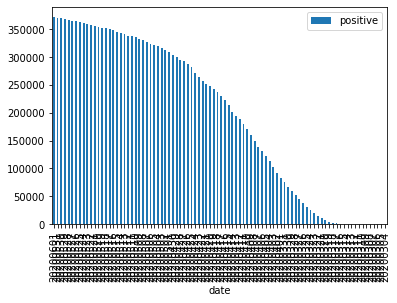

In [9]:
ny_daily.plot(x='date', y='positive', kind='bar')